## Entanglement Analysis

$h(t)=\frac{1}{10}\sum_{i=0}^{10} a_i (cos(\omega_i t+\pi)+1)$
$a_i \sim \text{Uniform}([0,2J])$
$\omega_i \sim \text{Normal}(1.5J,1.5J)$



#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
from src.qutip_lab.qutip_class import SpinOperator, SpinHamiltonian, SteadyStateSolver
from scipy.fft import fft, ifft
from scipy.sparse.linalg import eigsh,expm
import qutip
import os
from datetime import datetime

import torch
from tqdm import trange, tqdm
from src.qutip_lab.qutip_class import SpinOperator, SpinHamiltonian, SteadyStateSolver

import qutip
from typing import List
import os




/opt/anaconda3/envs/dft_env/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### Entropy vs. Size

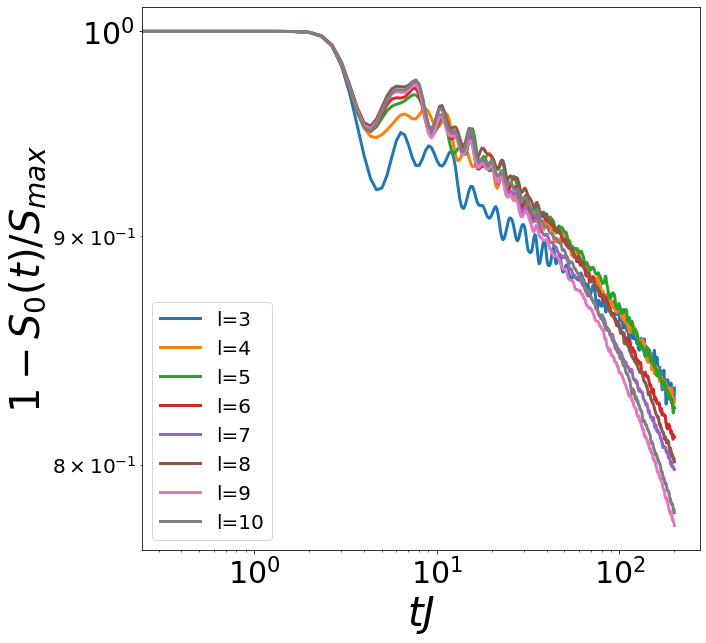

In [6]:
data=np.load('data/entanglement_analysis.npz')
ent0=data['entropy_0']
entl2=data['entropy_l2']
l=data['ls']
time=np.linspace(0,200,ent0.shape[-1])
plt.figure(figsize=(10,10))
for i in range(ent0.shape[0]):
    plt.plot(time,1-ent0[i]/np.log(2),label=f'l={l[i]}',linewidth=3)
plt.xlabel(r'$t J$',fontsize=40)
plt.loglog()
plt.ylabel(r'$1-S_0(t)/S_{max}$',fontsize=40)
plt.tick_params(labelsize=30,which='major')
plt.tick_params(labelsize=20, which='minor')

plt.legend(fontsize=20)
plt.show()

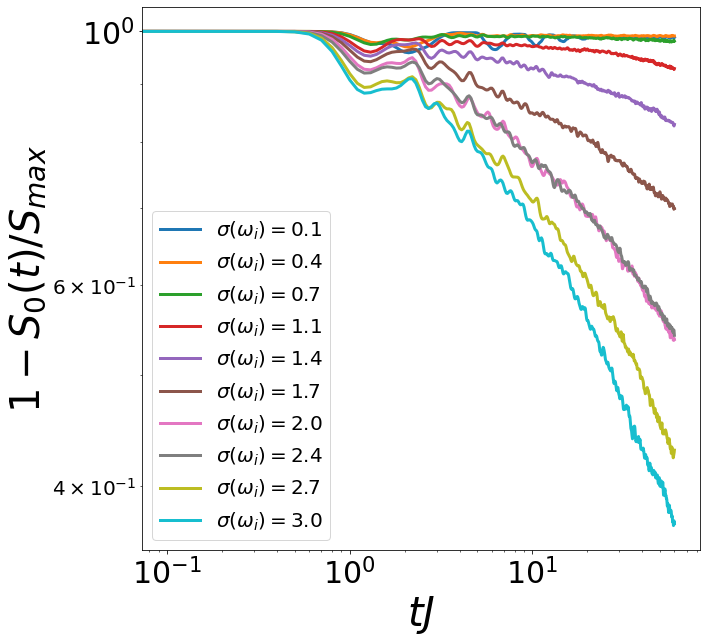

In [4]:
data=np.load('data/entanglement_analysis_different_sigma_rate.npz')
ent0=data['entropy_0']
rates_sigma=np.linspace(0.1,3,10)
entl2=data['entropy_l2']
l=data['ls']
time=np.linspace(0,60,ent0.shape[-1])
plt.figure(figsize=(10,10))
for i in range(ent0.shape[0]):
    plt.plot(time,1-ent0[i]/np.log(2),label=r'$\sigma(\omega_i)=$'+f'{rates_sigma[i]:.1f}',linewidth=3)
plt.xlabel(r'$t J$',fontsize=40)
plt.loglog()
plt.ylabel(r'$1-S_0(t)/S_{max}$',fontsize=40)
plt.tick_params(labelsize=30,which='major')
plt.tick_params(labelsize=20, which='minor')

plt.legend(fontsize=20)
plt.show()

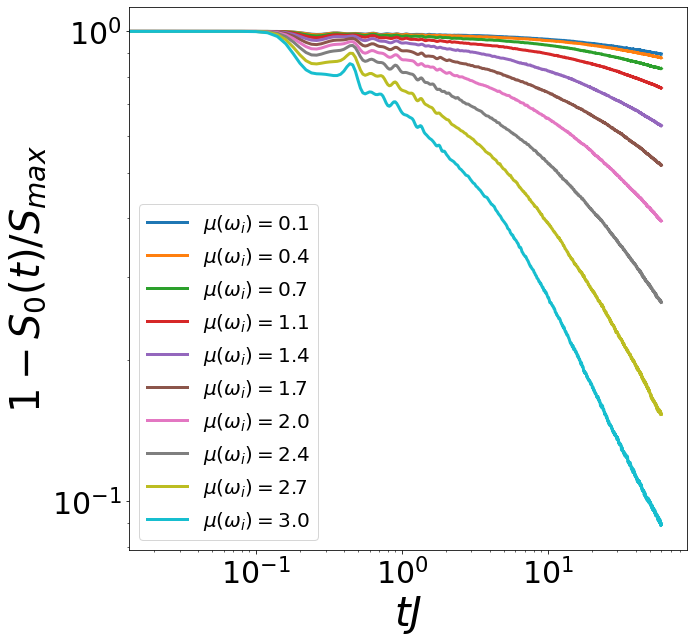

In [6]:
data=np.load('data/entanglement_analysis_mean.npz')
ent0=data['entropy_0']
entl2=data['entropy_l2']
rates_mean=data['parameter']
time=np.linspace(0,60,ent0.shape[-1])
plt.figure(figsize=(10,10))
for i in range(ent0.shape[0]):
    plt.plot(time,1-ent0[i]/np.log(2),label=r'$\mu(\omega_i)=$'+f'{rates_mean[i]:.1f}',linewidth=3)
plt.xlabel(r'$t J$',fontsize=40)
plt.loglog()
plt.ylabel(r'$1-S_0(t)/S_{max}$',fontsize=40)
plt.tick_params(labelsize=30,which='major')
plt.tick_params(labelsize=20, which='minor')

plt.legend(fontsize=20)
plt.show()

#### Example of sum of finite decay exponentials

0.001 1.0
0.6676666666666667 1.0
0.501 1.0
0.801 1.0
0.6676666666666667 1.0
0.8581428571428572 1.0
0.751 1.0
0.8898888888888888 1.0
0.801 1.0
0.9100909090909091 1.0
0.8343333333333334 1.0
0.9240769230768667 1.0
0.8581428571428572 1.0
0.9343333332785995 1.0
0.876 1.0
0.9421764651074027 1.0
0.8898888888888888 1.0
0.9483682831863194 1.0


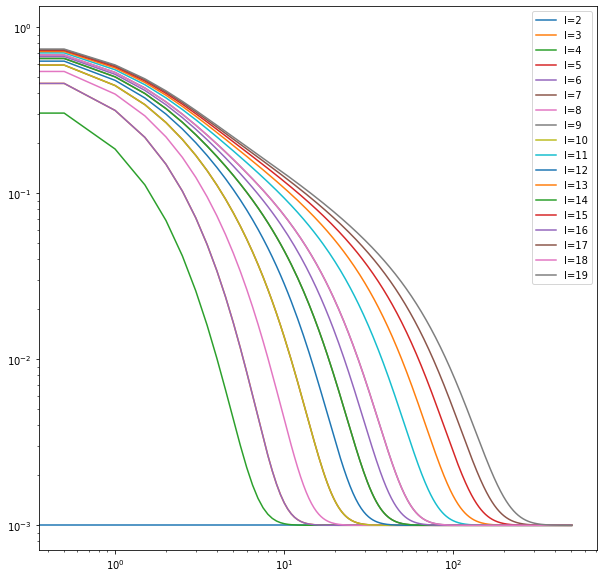

In [ ]:
plt.figure(figsize=(10,10))
for l in range(2,20):    
    gamma=1
    k=2*np.pi*np.arange(l)/l
    time=np.linspace(0,500,1000)
    total_exps=np.average(np.exp(-gamma*(np.sin(k)**2)[:,None]*time[None,:]),axis=0)
    if l==2:
        value_ref=total_exps[0]
    total_exps_normalized=value_ref*(total_exps-total_exps[-1])/total_exp[0]+10**-3
    print(total_exps_normalized[0],total_exps[0])
    plt.plot(time,total_exps_normalized,label=f'l={l}')
plt.legend(fontsize=10)
plt.loglog()
plt.show()